#### Project Name : Alzheimer’s Disease Classification

##### Objctive 
##### - Help doctors and researchers identify Alzheimer’s patients early using patient health and lifestyle data.
##### - Understand risk factors like age, family history, medical conditions, and lifestyle habits.
##### - Build predictive models that classify patients into Alzheimer’s vs. non-Alzheimer’s groups.
##### - Provide visual insights and an interactive app to make predictions accessible and easy to use.
##### - Support better healthcare planning and awareness for patients, families, and clinicians.

##### 1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Dataset
import pandas as pd
df = pd.read_csv("alzheimers_disease_data.csv")
df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


In [3]:
# It provides the number of Rows and Columns in the dataset
df.shape

(2149, 35)

In [4]:
# It provides the number of Rows and Columns in the dataset
df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [5]:
# It provides information about  the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [6]:
# It provide the top 5 rows in the dataset
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [7]:
# It provide the last 5 rows in the dataset
df.tail()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid
2148,6899,72,0,0,2,33.289738,0,7.890703,6.570993,7.941404,...,0,1,8.327563,0,1,0,0,1,0,XXXConfid


In [8]:
# Drop The Unwanted Columns
# Remove confidential and ID columns
df = df.drop(columns=['DoctorInCharge', 'PatientID'])  
df = df.dropna()  # Drop rows with missing values

In [9]:
# Basic Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346
SleepQuality,2149.0,7.051081,1.763573,4.002629,5.482997,7.115646,8.562521,9.999840


In [10]:
# Here checking the null values
df.isnull().sum()

Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness                0
Diagnosi

In [11]:
# correlation
z = df.corr(numeric_only=True).round(2)
z

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
Age,1.00,0.03,0.03,-0.06,-0.02,0.02,0.01,-0.01,-0.02,0.05,...,0.01,0.01,0.04,-0.04,0.01,0.03,-0.01,0.01,-0.02,-0.01
Gender,0.03,1.00,-0.00,-0.01,0.01,0.02,0.00,-0.04,0.01,0.01,...,0.03,0.00,0.01,0.00,-0.03,0.02,0.03,-0.00,-0.03,-0.02
Ethnicity,0.03,-0.00,1.00,0.03,-0.00,0.03,0.01,0.02,-0.02,0.03,...,-0.00,0.00,-0.02,0.01,0.02,-0.02,-0.03,0.02,-0.03,-0.01
EducationLevel,-0.06,-0.01,0.03,1.00,-0.02,-0.01,-0.01,-0.02,0.02,0.02,...,0.02,-0.00,0.01,0.03,-0.01,-0.02,-0.02,0.01,-0.01,-0.04
BMI,-0.02,0.01,-0.00,-0.02,1.00,0.02,-0.01,0.00,0.02,-0.01,...,-0.03,0.03,0.04,-0.01,-0.02,-0.03,-0.02,-0.04,0.07,0.03
Smoking,0.02,0.02,0.03,-0.01,0.02,1.00,0.01,0.01,-0.00,-0.00,...,-0.03,0.02,-0.01,-0.03,0.00,-0.03,-0.01,0.00,0.02,-0.00
AlcoholConsumption,0.01,0.00,0.01,-0.01,-0.01,0.01,1.00,0.02,0.02,-0.00,...,-0.02,-0.03,0.01,-0.01,-0.03,0.02,0.02,-0.00,-0.02,-0.01
PhysicalActivity,-0.01,-0.04,0.02,-0.02,0.00,0.01,0.02,1.00,0.01,-0.00,...,-0.00,0.01,-0.01,-0.01,-0.01,-0.02,-0.01,0.03,0.01,0.01
DietQuality,-0.02,0.01,-0.02,0.02,0.02,-0.00,0.02,0.01,1.00,0.05,...,-0.01,0.01,-0.01,-0.01,0.00,-0.03,0.03,0.05,0.01,0.01
SleepQuality,0.05,0.01,0.03,0.02,-0.01,-0.00,-0.00,-0.00,0.05,1.00,...,0.03,-0.02,-0.02,0.01,0.01,0.02,-0.02,0.01,0.00,-0.06


##### Information about the Correlation

In [12]:
# It tells us how two things are related.
# If one goes up and the other also goes up → positive correlation.
# If one goes up and the other goes down → negative correlation.
# If they don’t affect each other → no correlation.

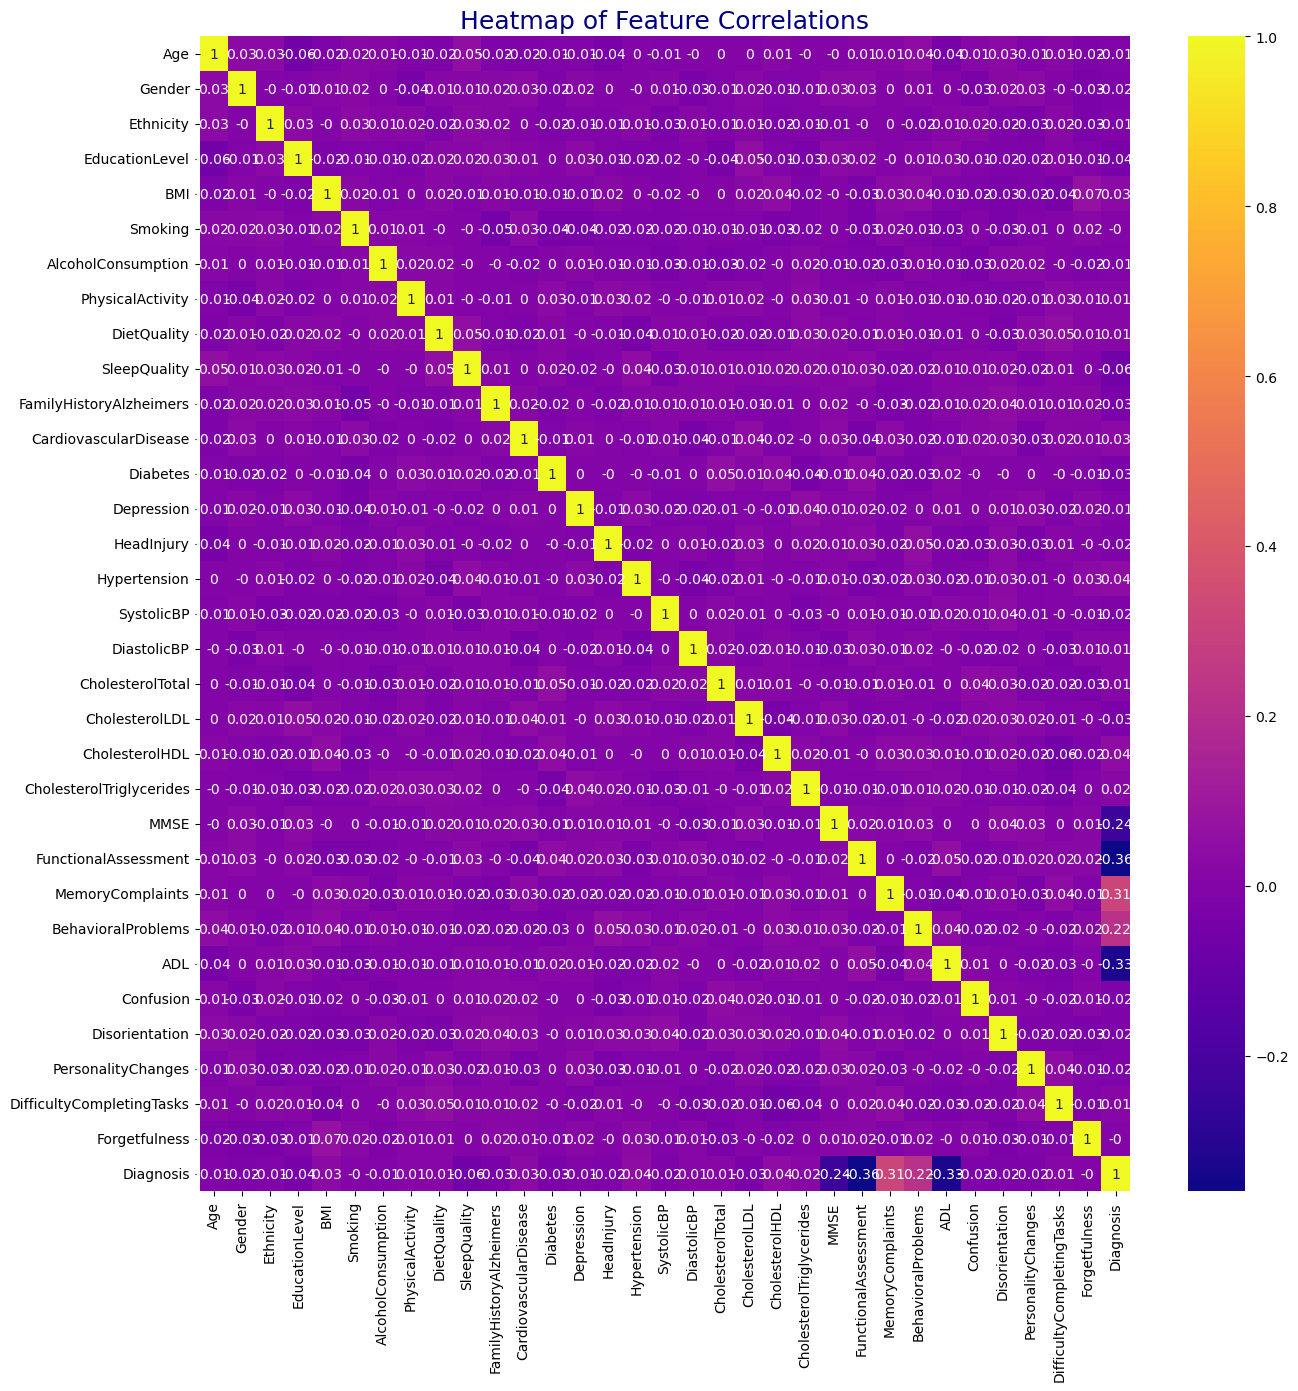

In [13]:
# Heatmap of Feature correlation
import matplotlib.pyplot as plt
import seaborn as sns
# Set figure size first
plt.figure(figsize=(15,15)) 
# Add color map for better contrast
sns.heatmap(z, annot=True, cmap='plasma')  
plt.title("Heatmap of Feature Correlations",fontsize=18,color= "navy") 
plt.show()

##### Information about the Heatmap

In [14]:
# MMSE score likely has a strong negative correlation with Alzheimer’s (lower score → higher chance of diagnosis).
# Family history may show a positive correlation with diagnosis.
# Age could show moderate positive correlation.
# Lifestyle factors (like physical activity, diet quality) may show weaker but still informative correlations.

In [15]:
# Get The categorical columns 
# These are categorical but coded as numbers (not continuous):
# Example:
# Gender: 0 = Male, 1 = Female
# EducationLevel: 0 = None, 1 = High School, 2 = Bachelor’s, 3 = Higher

categorical_cols = [
    'Gender','Ethnicity','EducationLevel','Smoking','FamilyHistoryAlzheimers','CardiovascularDisease','Diabetes','Depression',
    'HeadInjury','Hypertension','MemoryComplaints','BehavioralProblems','Confusion','Disorientation','PersonalityChanges',
    'DifficultyCompletingTasks','Forgetfulness','Diagnosis'   
]
categorical_cols

['Gender',
 'Ethnicity',
 'EducationLevel',
 'Smoking',
 'FamilyHistoryAlzheimers',
 'CardiovascularDisease',
 'Diabetes',
 'Depression',
 'HeadInjury',
 'Hypertension',
 'MemoryComplaints',
 'BehavioralProblems',
 'Confusion',
 'Disorientation',
 'PersonalityChanges',
 'DifficultyCompletingTasks',
 'Forgetfulness',
 'Diagnosis']

##### Bar Charts for Categorical Columns

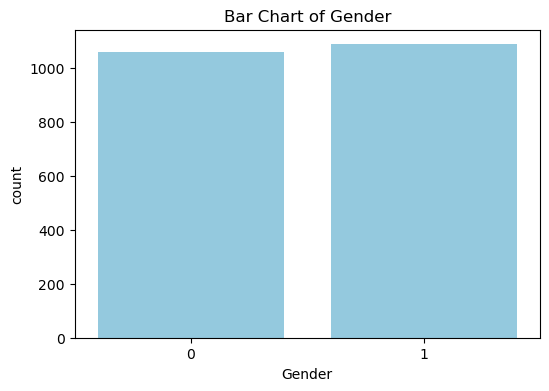

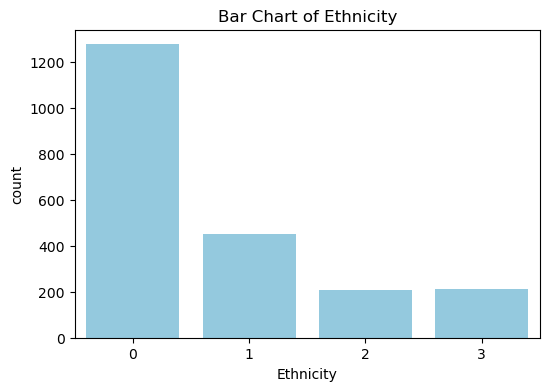

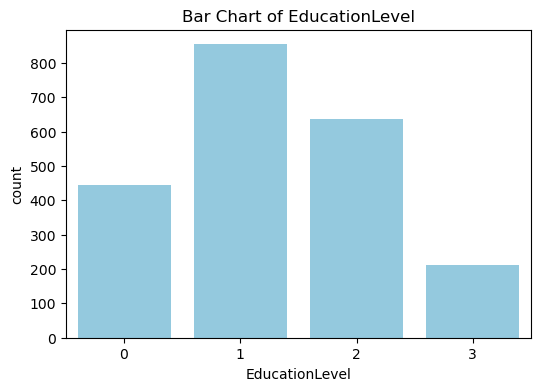

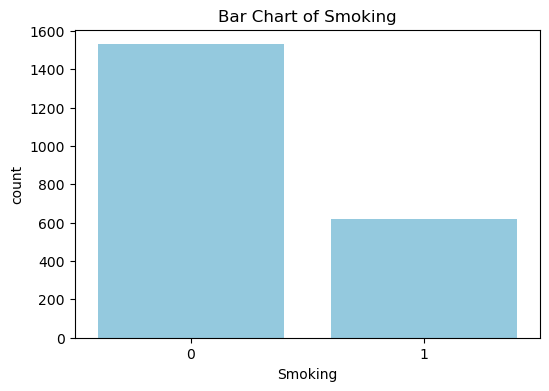

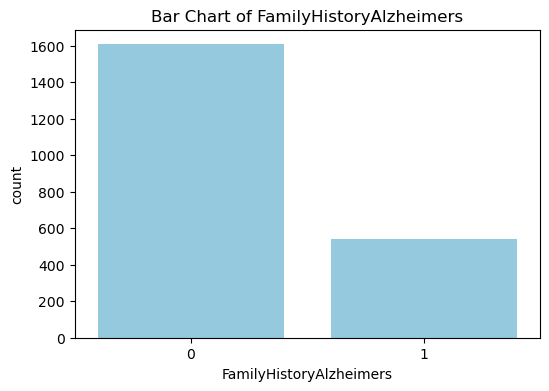

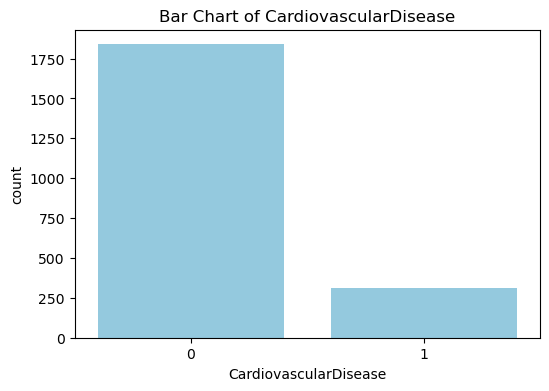

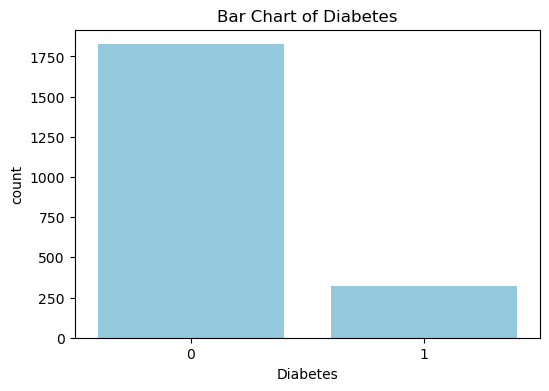

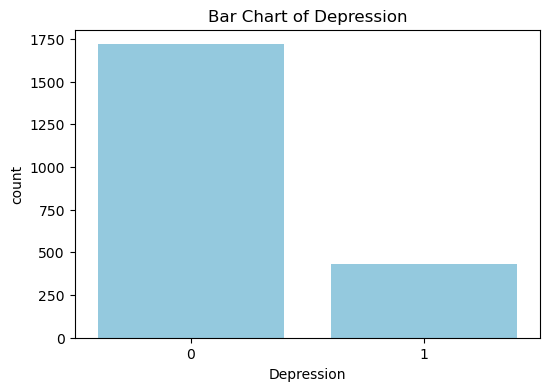

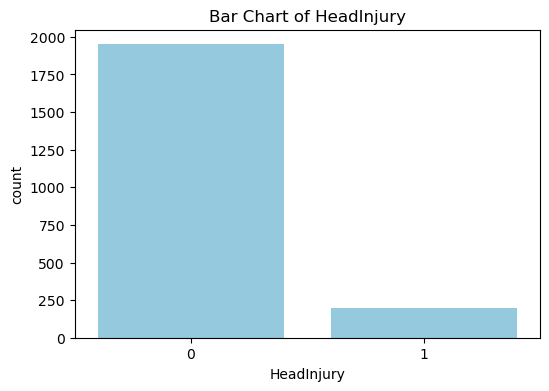

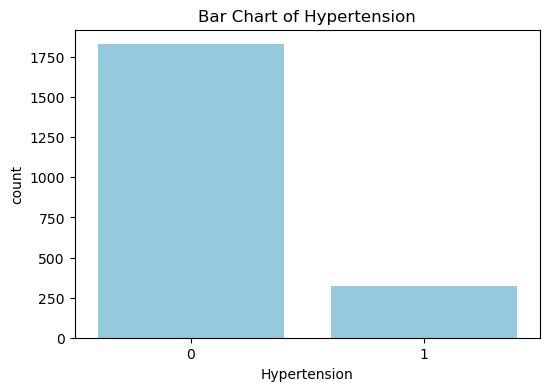

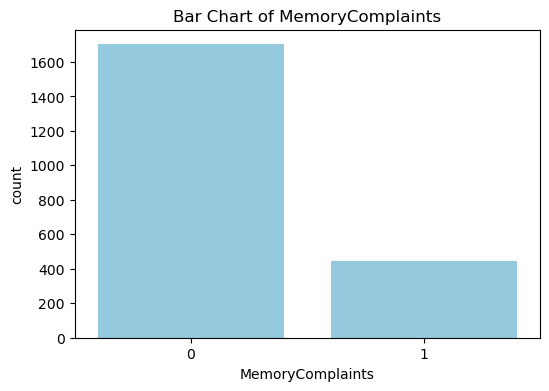

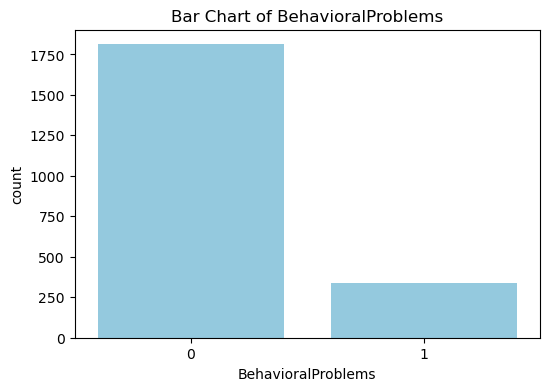

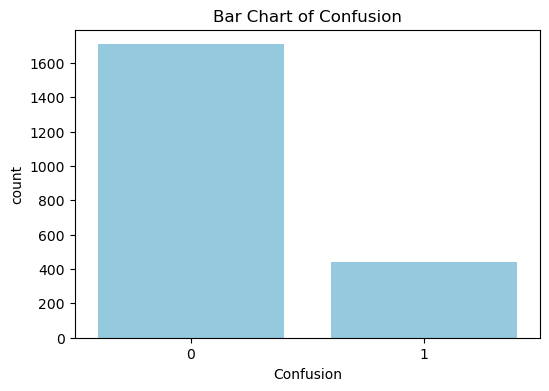

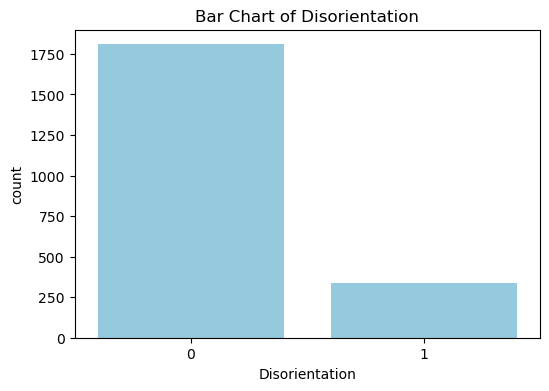

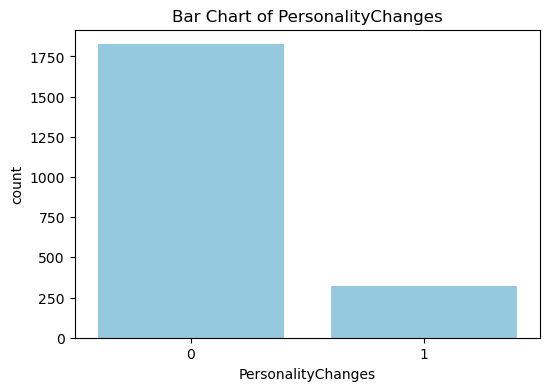

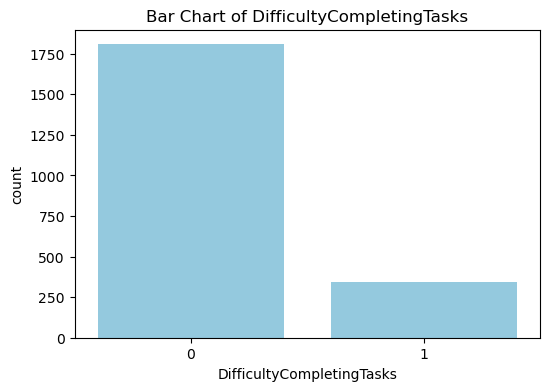

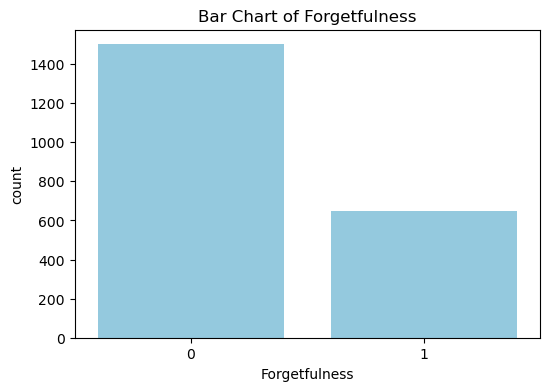

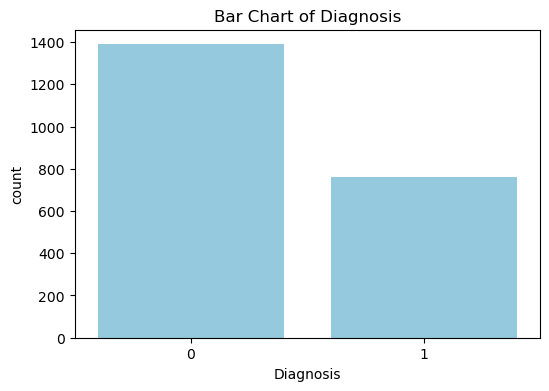

In [16]:
# Bar Charts for Categorical Columns
import matplotlib.pyplot as plt
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df,color = "skyblue")
    plt.title(f"Bar Chart of {col}")
    plt.show()

##### Information about the Barcharts for categorical Columns

In [17]:
# Gender → You’ll see two bars: one for males and one for females. The taller bar shows which group has more patients.
# Ethnicity → Bars for different groups (Caucasian, African American, Asian, Other). You can quickly spot which group is most common.
# Education Level → Bars for None, High School, Bachelor’s, Higher. This shows how educated most patients are.
# Medical/Lifestyle Factors (like Smoking, Diabetes, Hypertension, Family History) → Each has two bars: Yes and No. 
# We’ll notice whether most patients have these conditions or not.
# Symptoms (Forgetfulness, Confusion, Personality Changes, etc.) → Again, Yes vs No bars. You’ll see which symptoms are most frequent.
# Diagnosis → Two bars: Alzheimer’s vs No Alzheimer’s. This tells you how balanced the dataset is (more diagnosed or more non‑diagnosed).

In [18]:
# Define the 15 numerical columns based on dataset description
numerical_cols = [
    'Age','BMI','AlcoholConsumption','PhysicalActivity','DietQuality','SleepQuality','SystolicBP','DiastolicBP', 
    'CholesterolTotal','CholesterolLDL','CholesterolHDL','CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL'
]
numerical_cols

['Age',
 'BMI',
 'AlcoholConsumption',
 'PhysicalActivity',
 'DietQuality',
 'SleepQuality',
 'SystolicBP',
 'DiastolicBP',
 'CholesterolTotal',
 'CholesterolLDL',
 'CholesterolHDL',
 'CholesterolTriglycerides',
 'MMSE',
 'FunctionalAssessment',
 'ADL']

##### Histograms for Numerical Columns

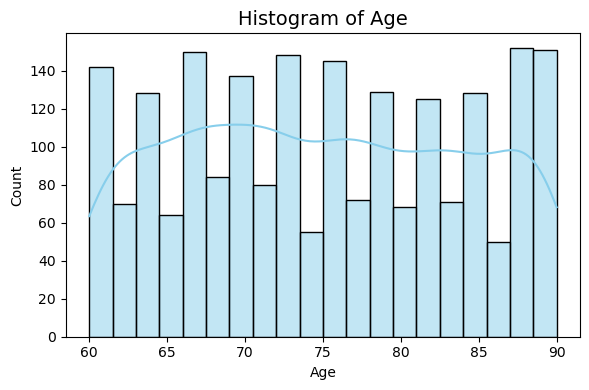

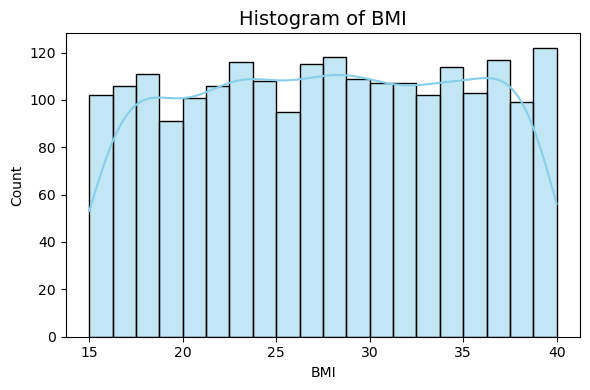

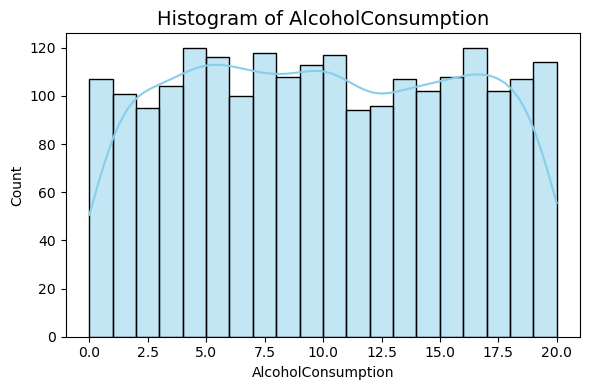

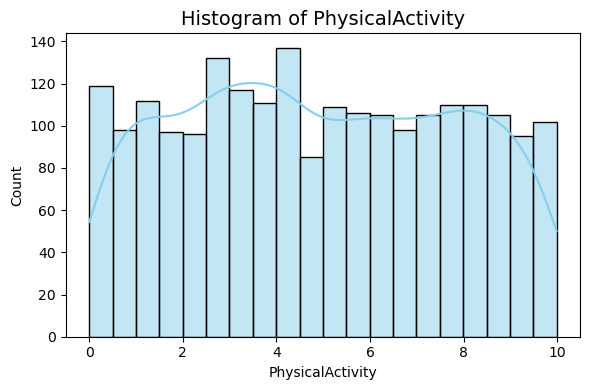

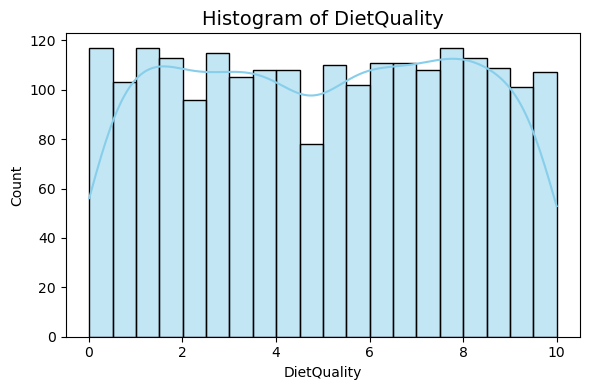

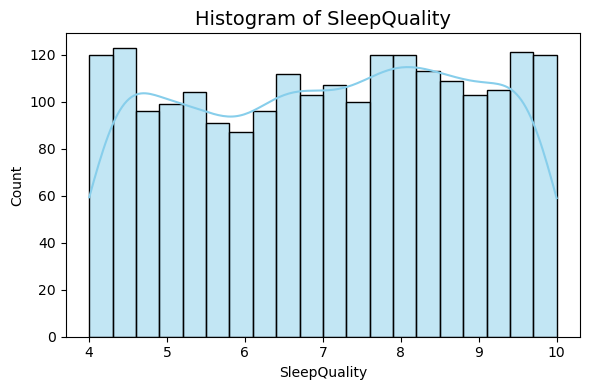

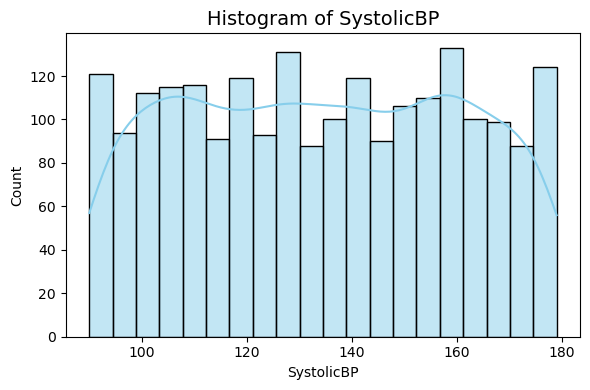

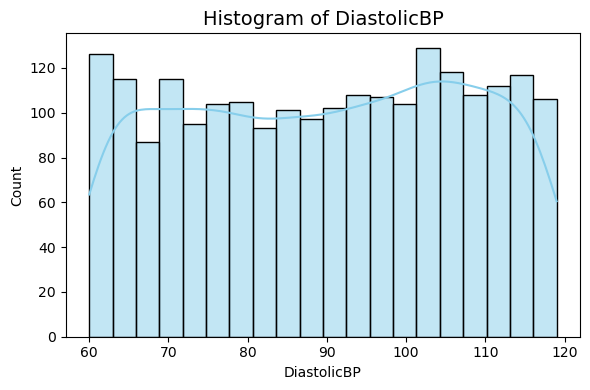

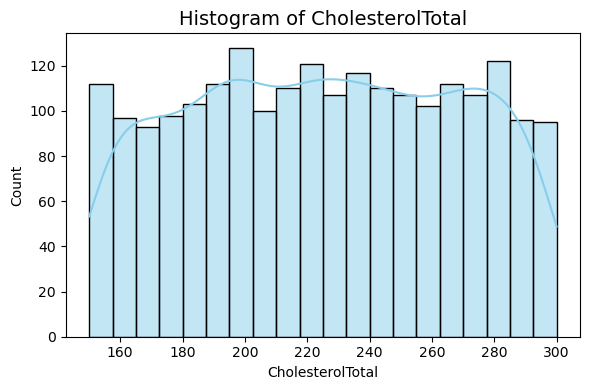

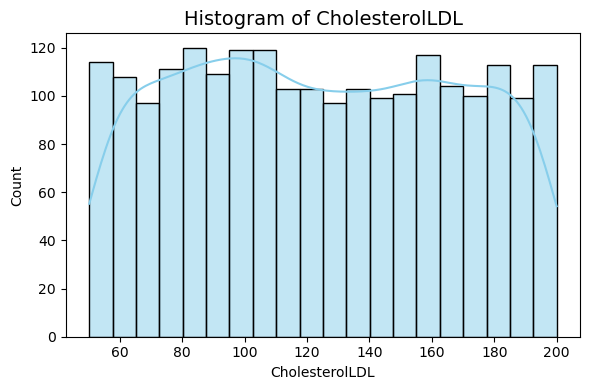

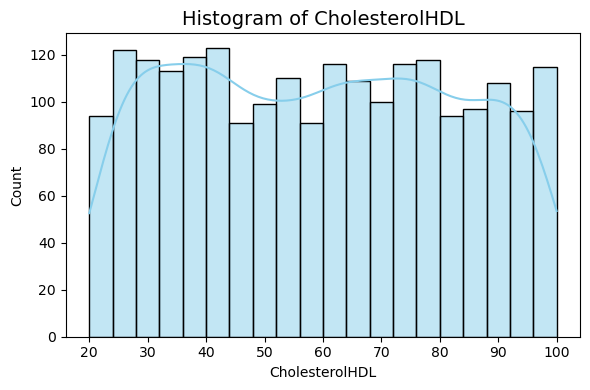

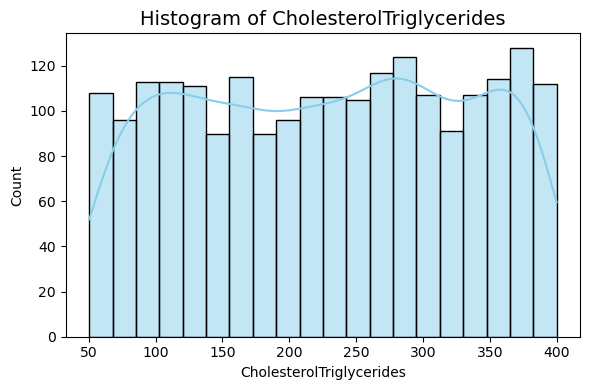

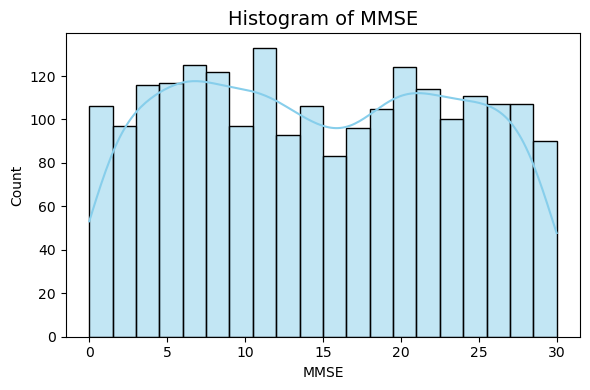

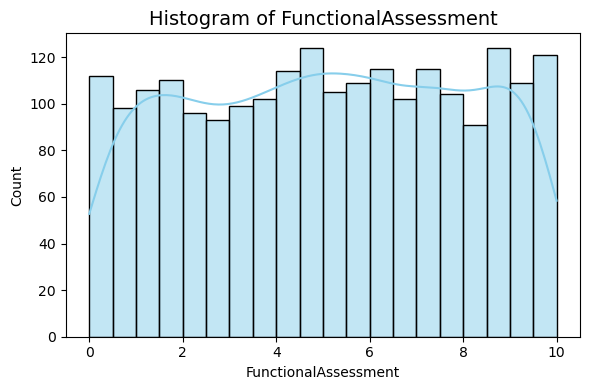

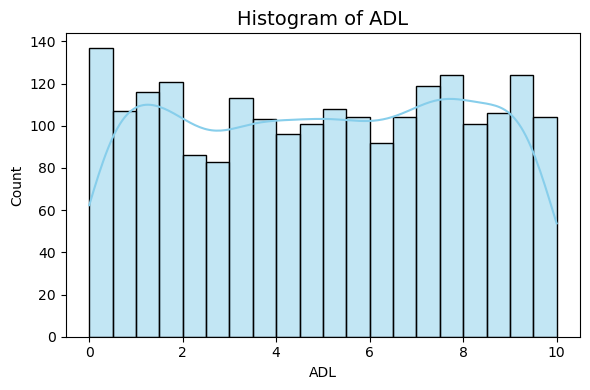

In [19]:
# Histogram for Numerical columns
import matplotlib.pyplot as plt
import seaborn as sns
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=20, kde=True, color='skyblue')  # histogram + KDE
    plt.title(f"Histogram of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

##### Information about the Histograms

In [20]:
# Age → Most patients are between 65 and 80 years old.
# BMI → Many patients fall in the normal to overweight range (20–30). Very few are underweight or extremely obese.
# Blood Pressure → Most systolic values are around 120–140, and diastolic around 70–90.
# Cholesterol → Many patients have average cholesterol levels, but some show higher values which may be risky.
# MMSE (Cognitive Score) → Two clear groups: higher scores (normal cognition) and lower scores (possible Alzheimer’s).
# ADL & Functional Assessment → Most patients score high (less impairment), but some have low scores showing more severe problems.
# Lifestyle Factors →
# Alcohol → most patients drink little or none.
# Physical activity → many patients are less active.
# Diet and sleep quality → usually average, with fewer extremes.

##### Box Plots for Numerical Columns

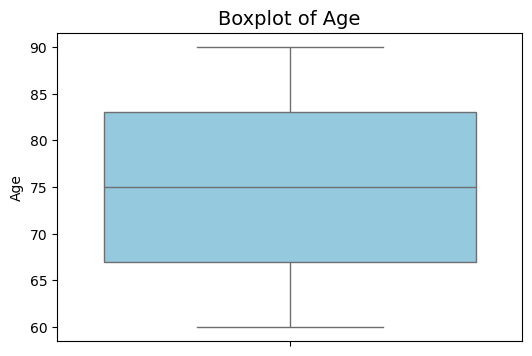

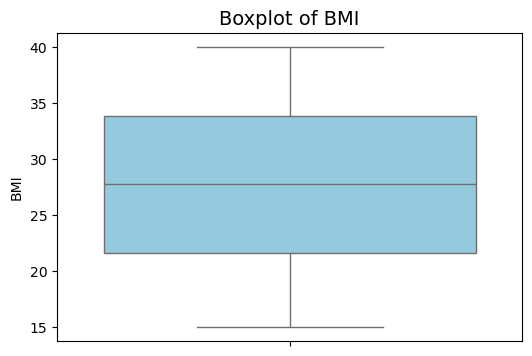

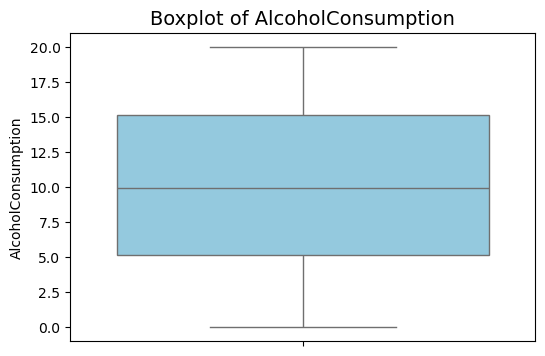

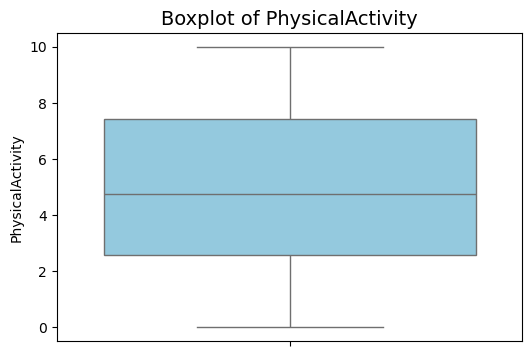

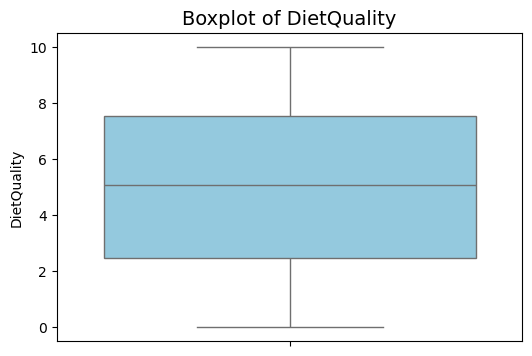

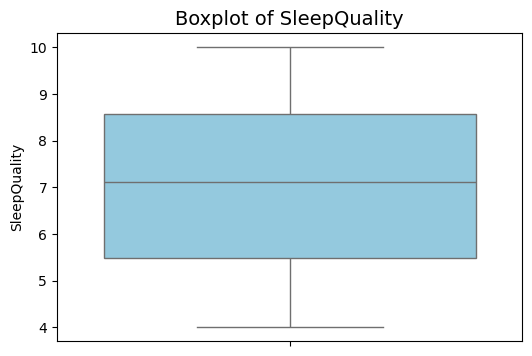

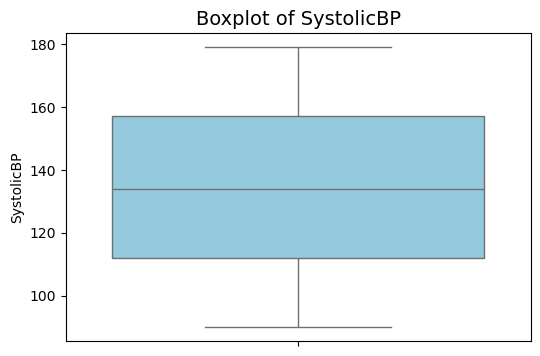

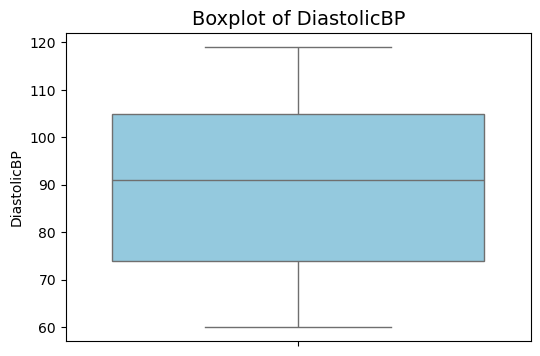

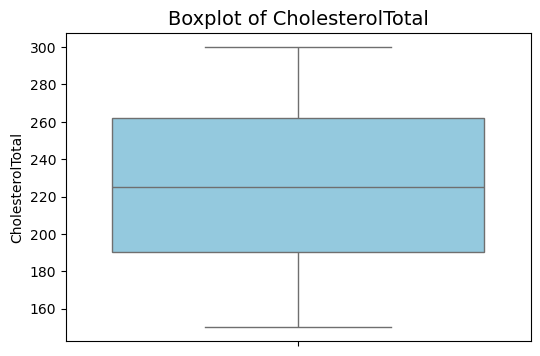

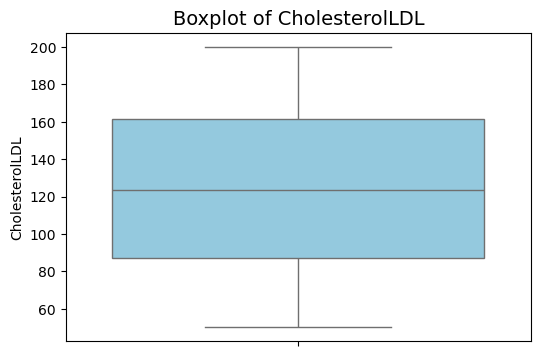

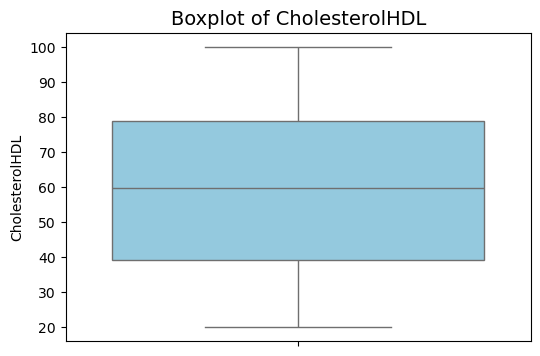

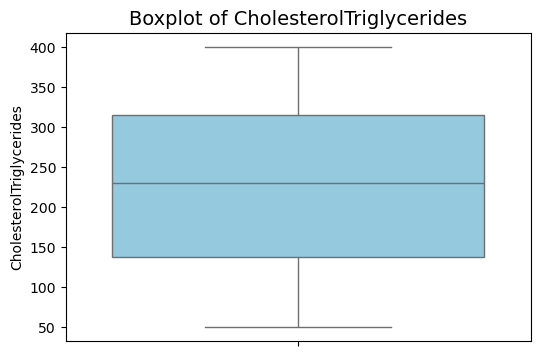

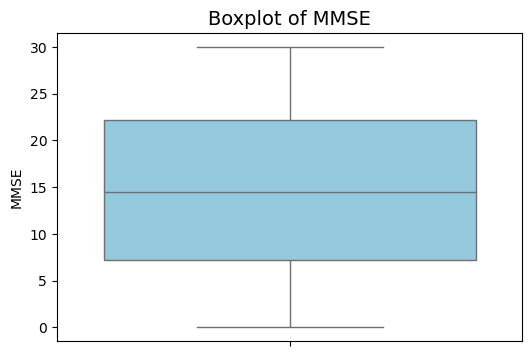

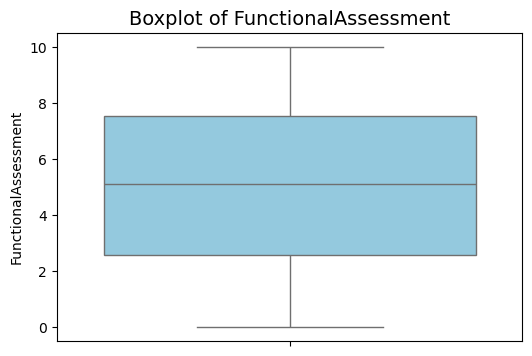

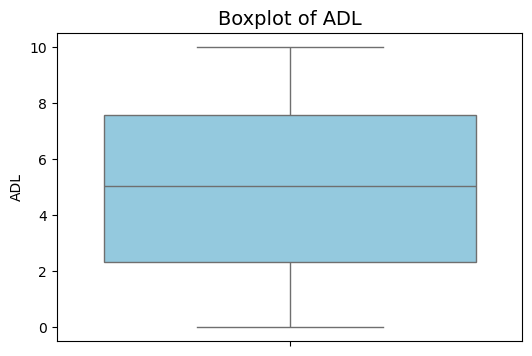

In [21]:
# Box plot for Numerical columns
import matplotlib.pyplot as plt
import seaborn as sns
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(df[col], color='skyblue')  
    plt.title(f"Boxplot of {col}", fontsize=14)
    plt.show()

#### Feature Scaling

In [22]:
x = df.drop(columns = ["PaitentID","DoctorInCharge"],errors = 'ignore')
x

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,7.535540,...,0.238667,0,0,4.492838,1,0,0,0,0,1
2145,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,8.555256,...,8.687480,0,1,9.204952,0,0,0,0,0,1
2146,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,5.769464,...,1.972137,0,0,5.036334,0,0,0,0,0,1
2147,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,8.322874,...,5.173891,0,0,3.785399,0,0,0,0,1,1


In [23]:
# Target Variable
y = df["Diagnosis"]
y

0       0
1       0
2       0
3       0
4       0
       ..
2144    1
2145    1
2146    1
2147    1
2148    0
Name: Diagnosis, Length: 2149, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state = 42)

In [25]:
# Data Transformation
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train[numerical_cols] = scaler.fit_transform(x_train[numerical_cols])
x_test[numerical_cols] = scaler.transform(x_test[numerical_cols])

#### Model Building

#### Logistic-Regression 

In [26]:
from sklearn.linear_model import LogisticRegression
# Fit model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [27]:
# Predictions
y_predict = model.predict(x_train)
y_predict

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

#### Model Evalution

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train,y_predict)
cm

array([[1112,    0],
       [   0,  607]], dtype=int64)

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1112
           1       1.00      1.00      1.00       607

    accuracy                           1.00      1719
   macro avg       1.00      1.00      1.00      1719
weighted avg       1.00      1.00      1.00      1719



In [30]:
from sklearn.metrics import accuracy_score
print("Training Accuracy Score:",accuracy_score(y_train,y_predict))

Training Accuracy Score: 1.0


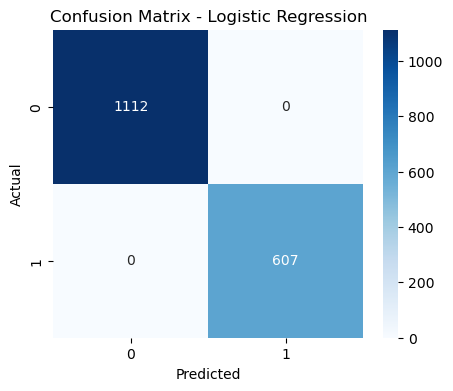

In [31]:
# Confusion Matrix - Logistic Regression
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_train, y_predict)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### Randaom Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
# Predictions
y_pred_rf = rf_model.predict(x_test)
y_pred_rf

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,

In [34]:
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_test,y_pred_rf)
cm_rf

array([[277,   0],
       [  0, 153]], dtype=int64)

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       277
           1       1.00      1.00      1.00       153

    accuracy                           1.00       430
   macro avg       1.00      1.00      1.00       430
weighted avg       1.00      1.00      1.00       430



In [36]:
from sklearn.metrics import accuracy_score
print("Testing Accuracy Score:",accuracy_score(y_test,y_pred_rf))

Testing Accuracy Score: 1.0


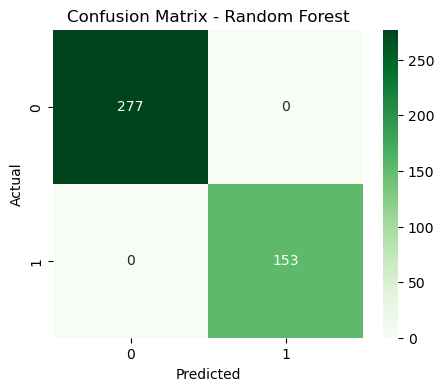

In [37]:
# Confusion Matrix Heatmap
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

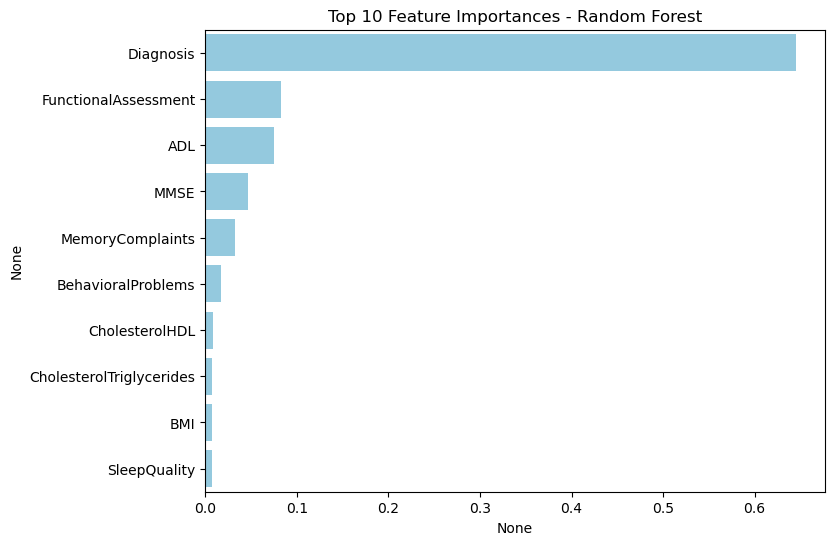

In [38]:
# Feature Importance
feat_importances = pd.Series(rf_model.feature_importances_, index=x.columns)
plt.figure(figsize=(8,6))
sns.barplot(x=feat_importances.sort_values(ascending=False)[:10],
            y=feat_importances.sort_values(ascending=False).index[:10],
            color="skyblue")
plt.title("Top 10 Feature Importances - Random Forest")
plt.show()